<a href="https://colab.research.google.com/github/IbukunGracey/PyTorch-Basics/blob/main/06_Neural_Network_with_PyTorch_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### Regression task using the Califonia Housing Dataset


We will be using the Califonia Housing dataset from kaggle  https://www.kaggle.com/datasets/dhirajnirne/california-housing-data to build a simple neural network model that can predict the average house price in califonia.



Download the Dataset from the Kaggle link above or use the one attached to this notebook on the learning platform.

Data Description:

The columns in this dataset are:

1. longitude
A measure of how far west a house is; a higher value is farther west


2. latitude
A measure of how far north a house is; a higher value is farther north


3. housing_median_age
Median age of a house within a block; a lower number is a newer building


4. total_rooms
Total number of rooms within a block


5. total_bedrooms
Total number of bedrooms within a block


6. population
Total number of people residing within a block


7. households
Total number of households, a group of people residing within a home unit, for a block


8. median_income
Median income for households within a block of houses (measured in tens of thousands of US Dollars)


9. median_house_value
Median house value for households within a block (measured in US Dollars)


10. ocean_proximity
The house has a Ocean view or not.

Steps:

1. Load your data/ Do some data preparation
2. Create a neural network model
3. Turn on the model/ Instantiate the model
4. Split the data
5. Train your model
6. Validate the model using the test data
7. Fine tune your model
8. Make Predictions
9. Save your model


In [ ]:
# Install torchview for visualizing our model
!pip install torchview

In [ ]:
# Install torchview for visualizing our model
!pip install torchinfo

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import random
# import pandas as pd
# import torch
# from torch import nn, optim
# from torch.utils.data import DataLoader, Dataset

# from torchinfo import summary

# from sklearn import datasets
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.model_selection import train_test_split

In [ ]:
# X, y = datasets.fetch_california_housing(return_X_y=True)

In [ ]:
### IMPORT STATEMENTS
import torch                  # import the torch module
import torch.nn as nn         # import the neural hetwork library in pytorch
import torch.nn.functional as F  # this helps to move data forward in our function
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from torchinfo import summary

from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler


import seaborn as sns
# from torchview import draw_graph   # a visual to draw our network graph

###1.  Load Data and do some data preparations

Q1: Read in the housing.csv file and print out the first five records.




In [ ]:
#load the data
data = '/content/housing.csv'
df = pd.read_csv(data)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Dealing with missing values

Check for missing values in the data set. There is 1 columns with 207 rows missing values. We can drop the 207 rows for a start.

In [ ]:
#check for the columns with missing values
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
#check for the rows with missing values
df[df.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


Q3: Drop all the missing values in the dataset using the `dropna` function, don't forget to include the inplace arguement and print the shape

In [ ]:
#drop the missing values
df.dropna(inplace= True)
df.shape

(20433, 10)

#### Let us check the distribution of the target label "median_house_value"

In [ ]:
df.median_house_value.describe()

,median_house_value
count,20433.000000
mean,206864.413155
std,115435.667099
min,14999.000000
25%,119500.000000
50%,179700.000000
75%,264700.000000
max,500001.000000


<Axes: ylabel='Density'>

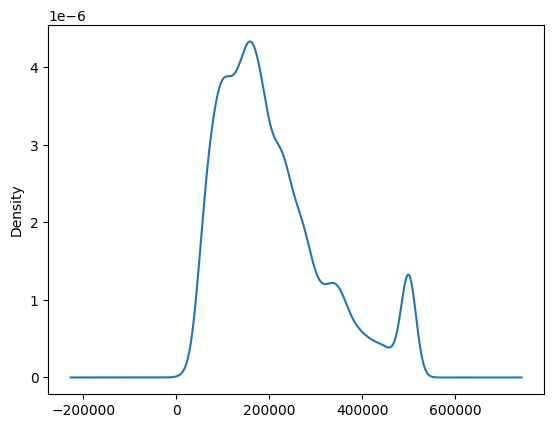

In [ ]:
#Let us visualize it
df.median_house_value.plot(kind='kde')

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

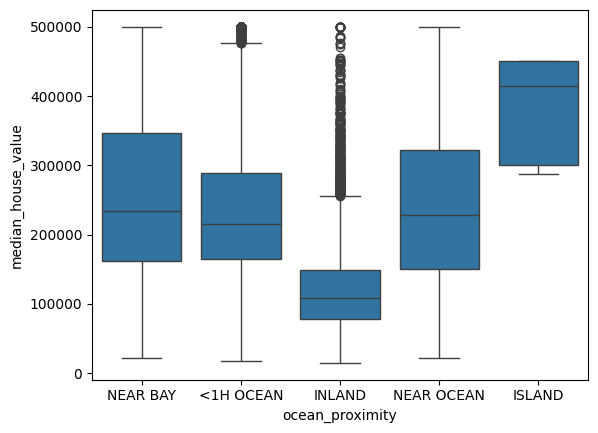

In [ ]:
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)

#### Next, Let's select the features and target that will be used to build our neural network model



In [ ]:
# Define the features and label
x = df.drop(['median_house_value',	'ocean_proximity'] , axis =1)
y = df['median_house_value']


Print the first 5 rows in x

In [ ]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


### 2. Create the neural network model
Q7: Using a Model Class that inherits the neural newtork. Complete the code below to include:
1. Input features = 8,
2. Hidden layer 1 = 12
3. Hidden layer 2 = 4
5. Output layer = 1

In [ ]:
class HousingModel(nn.Module):
  # Define the Input layers (4 features for the penguins) -->
  # Hidden layer 1 with n neurons -->
  # Hidden layer 2 with m neurons -->
  # output with 1 prediction

  #initialize the model Self
  def __init__(self, input_features=8, h1=12, h2=4, output_features=1):
    super().__init__()  #instantiate our nn.Module

    #define the layers
    self.fc1 = nn.Linear(input_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, output_features)

  #Create a forward network function: function to move everything forward
  # Relu- if output less than 0, make it 0, if output more than 0 use the output
  def forward(self, x):
    x = F.relu(self.fc1(x)) #start with layer 1 and apply and activation function
    x = F.relu(self.fc2(x)) #move to layer 2 and apply an activation function
    x = self.out(x)         #move to output layer without an activation function
    return x

In [ ]:
summary(HousingModel(), input_size=(12, 8))

Layer (type:depth-idx)                   Output Shape              Param #
HousingModel                             [12, 1]                   --
├─Linear: 1-1                            [12, 12]                  108
├─Linear: 1-2                            [12, 4]                   52
├─Linear: 1-3                            [12, 1]                   5
Total params: 165
Trainable params: 165
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

Picks a manual seed for randomization an set at 32

In [ ]:
# Pick a manual seed for randomization
torch.manual_seed(32)


Create an instance of the housing model with a variable name `model`

In [ ]:
# Create an instance of the model - Turn the model ON
model = HousingModel()

### 3. Split the data to train and test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=32)

In [ ]:
# Convert X-inputs to float tensors
# x_train = torch.tensor(x_train, dtype=torch.double)
x_train = torch.FloatTensor(x_train.values)
x_test =torch.FloatTensor(x_test.values)

#convert y-label to long tensors
# y_train = torch.tensor(y_train, dtype=torch.double)
y_train = torch.LongTensor(y_train.values)
y_test =torch.LongTensor(y_test.values)


### 4. Train the model

1. Choose a Criterion for the model using the nn.CrossEntropyLoss() and assign it to a variable name `criterion`  

2. Choose an Optimizer for the model using the `torch.optim.Adam` module , with a learning rate of 0.01 and assign it to a variable name `optimizer`  

In [ ]:
# Set the criterion of model to measure the error,
# how far off the prediction are from the data

criterion = nn.L1Loss()

# Choose an Optimizer (Adam), learning rate
# (if error doesn't go down after a bunch of iterations (epoch), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr =0.01) #the lower the lr the more the time to train

In [ ]:
# Train the model
#Epoch? (if 1, it implies the number of time the model is trained is once)

epoch =50
losses = []   #this list is to store the losses in each epoch

# Make sure the model is on the correct device for training (e.g., 'cpu')
# In this case, it's already on CPU by default, but explicitly moving it can be good practice
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
x_train = x_train.to(device)
y_train = y_train.to(device)


for i in range(epoch):
  # Go forward and get prediction
  y_pred = model.forward(x_train) #get predicted result

  #Measure the loss/error, it will be high at first- How far predictions from data
  loss = criterion(y_pred, y_train) #predicted values vs the y_train

  #Keep track of our losses
  losses.append(loss.detach().cpu().numpy())

  #print every 5 epoch
  if i % 5== 0:
    print(f'Epoch: {i} and loss: {loss:.4f}')

  #Do some back propagation: take the error rate of forward propagation and feed it back
  #through the network to fine tune the weight
  optimizer.zero_grad() # reset grads
  loss.backward()
  optimizer.step() # update weights


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:128: UserWarning: Using a target size (torch.Size([16346])) that is different to the input size (torch.Size([16346, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch: 0 and loss: 206282.4062
Epoch: 5 and loss: 206282.3594
Epoch: 10 and loss: 206282.1875
Epoch: 15 and loss: 206282.1719
Epoch: 20 and loss: 206282.1406
Epoch: 25 and loss: 206282.1250
Epoch: 30 and loss: 206282.1250
Epoch: 35 and loss: 206281.7344
Epoch: 40 and loss: 206281.7344
Epoch: 45 and loss: 206281.7031


Text(0.5, 0, 'Epoch')

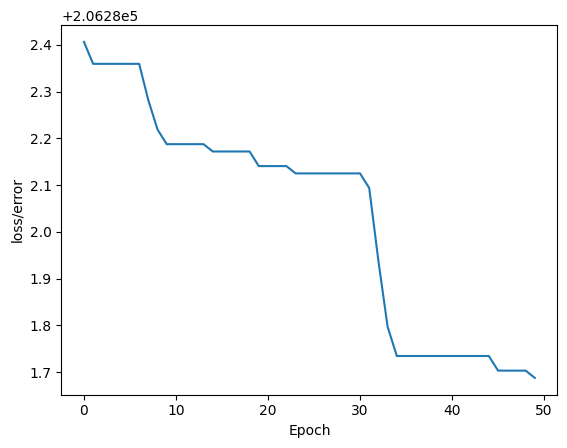

In [ ]:
#Visualize the result
plt.plot(range(epoch), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')

### 4. Model Validation on Test Data

In [ ]:
#Evaluate Model on Test Data set
with torch.no_grad():   #This turns off back propagation
  #Evaluate the data on the 20% of data
  x_test = x_test.to(device)
  y_test = y_test.to(device)

  y_eval = model.forward(x_test) # X_test are features from our test set, y_eval will be
  loss = criterion(y_eval, y_test) # Find the test loss or error
loss

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:128: UserWarning: Using a target size (torch.Size([4087])) that is different to the input size (torch.Size([4087, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


tensor(209191.2969, device='cuda:0')

### Improving Model Performance

The result of the train and test loss, shows a very large error. To improve the model performace, we can do the following
1. Scale the features and target
2. Tune the hyperparameter by changing the epoch, learning rate, criterion, activation functions, number of layers etc.
3. Do some feature engineering etc.

We will start by scaling the features and let's see how it affects the performance of our model.

### 3. Split the data to train and test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=32)


**Initialize the MinMaxScaler:** Create separate instances of the
MinMaxScaler for features and the target variable. This allows for independent scaling and prevents data leakage between them.

In [ ]:
# #Scale the features X using Min-Max Scaler because it preserves the original distribution of the data.
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

**Fit and Transform Features:** Fit the feature scaler on the training features and transform both the training and testing features. It's crucial to fit only on the training data to avoid data leakage.

In [ ]:
x_train_scaled = feature_scaler.fit_transform(x_train)
x_test_scaled = feature_scaler.transform(x_test)

**Fit and Transform Target:** Reshape the target variable to a 2D array using reshape(-1, 1) before fitting and transforming. Apply the target scaler to both the training and testing target variables.

In [ ]:
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

Q10: Convert X-inputs to float tensors using `torch.FloatTensor` and y-inputs to long tensor using `torch.LongTensor`

In [ ]:
# Convert X-inputs to float tensors
# x_train = torch.tensor(x_train, dtype=torch.double)
x_train = torch.FloatTensor(x_train_scaled)
x_test =torch.FloatTensor(x_test_scaled)

#convert y-label to long tensors
# y_train = torch.tensor(y_train, dtype=torch.double)
y_train = torch.LongTensor(y_train_scaled)
y_test =torch.LongTensor(y_test_scaled)

In [ ]:
y_train

tensor([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]])

In [ ]:
# Set the criterion of model to measure the error,
# how far off the prediction are from the data

criterion = nn.L1Loss()

# Choose an Optimizer (Adam), learning rate
# (if error doesn't go down after a bunch of iterations (epoch), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr =0.01) #the lower the lr the more the time to train

In [ ]:
model

HousingModel(
  (fc1): Linear(in_features=8, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
# Train the model
#Epoch? (if 1, it implies the number of time the model is trained is once)

epoch =50
losses = []   #this list is to store the losses in each epoch

# Make sure the model is on the correct device for training (e.g., 'cpu')
# In this case, it's already on CPU by default, but explicitly moving it can be good practice
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
x_train = x_train.to(device)
y_train = y_train.to(device)


for i in range(epoch):
  # Go forward and get prediction
  y_pred = model.forward(x_train) #get predicted result

  #Measure the loss/error, it will be high at first- How far predictions from data
  loss = criterion(y_pred, y_train) #predicted values vs the y_train

  #Keep track of our losses
  losses.append(loss.detach().cpu().numpy())

  #print every 5 epoch
  if i % 5== 0:
    print(f'Epoch: {i} and loss: {loss:.4f}')

  #Do some back propagation: take the error rate of forward propagation and feed it back
  #through the network to fine tune the weight
  optimizer.zero_grad() # reset grads
  loss.backward()
  optimizer.step() # update weights


Epoch: 0 and loss: 0.6902
Epoch: 5 and loss: 0.6221
Epoch: 10 and loss: 0.5766
Epoch: 15 and loss: 0.5280
Epoch: 20 and loss: 0.4503
Epoch: 25 and loss: 0.3351
Epoch: 30 and loss: 0.1639
Epoch: 35 and loss: 0.1379
Epoch: 40 and loss: 0.0901
Epoch: 45 and loss: 0.0951


Text(0.5, 0, 'Epoch')

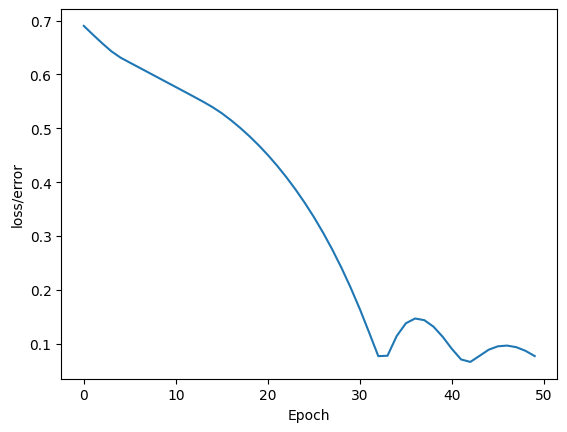

In [ ]:
#Visualize the result
plt.plot(range(epoch), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')


In [ ]:
#Evaluate Model on Test Data set
with torch.no_grad():   #This turns off back propagation
  #Evaluate the data on the 20% of data
  x_test = x_test.to(device)
  y_test = y_test.to(device)

  y_eval = model.forward(x_test) # X_test are features from our test set, y_eval will be
  loss = criterion(y_eval, y_test) # Find the test loss or error

In [ ]:
loss   # the test loss is close to the train loss, we have a great model

tensor(0.0726, device='cuda:0')

Viola! the error dropped drastically because the dataset was scaled. The new training loss is 0.0951 and test loss is 0.0726.

#### Track the individual test data

In [ ]:
len(y_test)

4087

In [ ]:
x_test[:5]

tensor([[2.9781e-01, 6.4043e-01, 4.9020e-01, 4.5552e-02, 3.7709e-02, 1.8218e-02,
         3.8481e-02, 3.5507e-01],
        [4.5717e-01, 4.4681e-01, 6.6667e-01, 4.0821e-02, 5.9280e-02, 3.9351e-02,
         6.2654e-02, 1.1656e-01],
        [1.8725e-01, 5.7447e-01, 2.9412e-01, 9.5809e-02, 1.3004e-01, 5.5579e-02,
         1.3386e-01, 2.3940e-01],
        [5.8466e-01, 2.0426e-01, 6.8627e-01, 2.0856e-03, 1.7070e-03, 7.2872e-04,
         2.6311e-03, 1.9828e-01],
        [5.9761e-01, 1.5745e-01, 8.2353e-01, 5.3919e-02, 8.1161e-02, 4.2238e-02,
         7.1534e-02, 1.1913e-01]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([[0],
        [0],
        [0],
        [0],
        [0]], device='cuda:0')

In [ ]:
#Let's track the total correct data

correct = 0
with torch.no_grad():    #turn off back propagation
  for i, data in enumerate(x_test):
    y_val = model.forward(data)   # pass test data through the model
    # y_val= target_scaler.inverse_transform(y_val)
    #will tell us what type of flower class our network think it is
    # argmax is a function that finds the index of the maximum value within an array or along a specified axis.
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.item()}')

    # check number of correct labels
    if y_val.argmax().item() == y_test[i]:
      correct +=1
print(f'We got {correct} correct!')

1.) tensor([-0.0041], device='cuda:0') 	 tensor([0], device='cuda:0') 	 -0.00412365049123764
2.) tensor([-0.0062], device='cuda:0') 	 tensor([0], device='cuda:0') 	 -0.006196647882461548
3.) tensor([-0.0025], device='cuda:0') 	 tensor([0], device='cuda:0') 	 -0.0024568885564804077
4.) tensor([-0.0038], device='cuda:0') 	 tensor([0], device='cuda:0') 	 -0.003768138587474823
5.) tensor([-0.0042], device='cuda:0') 	 tensor([0], device='cuda:0') 	 -0.004203684628009796
6.) tensor([-0.0084], device='cuda:0') 	 tensor([0], device='cuda:0') 	 -0.00836917757987976
7.) tensor([-0.0066], device='cuda:0') 	 tensor([0], device='cuda:0') 	 -0.006561055779457092
8.) tensor([-0.0102], device='cuda:0') 	 tensor([0], device='cuda:0') 	 -0.010196328163146973
9.) tensor([-0.0043], device='cuda:0') 	 tensor([0], device='cuda:0') 	 -0.0042839571833610535
10.) tensor([-0.0060], device='cuda:0') 	 tensor([0], device='cuda:0') 	 -0.005971953272819519
11.) tensor([-0.0039], device='cuda:0') 	 tensor([0], devic